In [2]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
# 기본세팅 - 한글폰트 설정
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import font_manager
import matplotlib

In [4]:
# 폰트 찾기
font_manager.findSystemFonts()

['C:\\Windows\\Fonts\\GILSANUB.TTF',
 'C:\\Windows\\Fonts\\HMKMRHD.TTF',
 'C:\\Windows\\Fonts\\constanz.ttf',
 'C:\\Windows\\Fonts\\COPRGTB.TTF',
 'C:\\Windows\\Fonts\\l_10646.ttf',
 'C:\\Windows\\Fonts\\webdings.ttf',
 'C:\\Windows\\Fonts\\H2HDRM.TTF',
 'C:\\Windows\\Fonts\\cambriaz.ttf',
 'C:\\Windows\\Fonts\\BOOKOSB.TTF',
 'C:\\Windows\\Fonts\\ntailub.ttf',
 'C:\\Windows\\Fonts\\ANTQUAI.TTF',
 'C:\\Windows\\Fonts\\msjhbd.ttc',
 'C:\\Windows\\Fonts\\segoeprb.ttf',
 'C:\\Windows\\Fonts\\BOOKOSI.TTF',
 'C:\\Windows\\Fonts\\LFAX.TTF',
 'C:\\Windows\\Fonts\\seguihis.ttf',
 'C:\\Windows\\Fonts\\H2GTRM.TTF',
 'C:\\Windows\\Fonts\\ROCKBI.TTF',
 'C:\\Windows\\Fonts\\GIL_____.TTF',
 'C:\\Windows\\Fonts\\GILC____.TTF',
 'C:\\Windows\\Fonts\\GOUDYSTO.TTF',
 'C:\\Windows\\Fonts\\HMFMMUEX.TTC',
 'C:\\Windows\\Fonts\\ITCBLKAD.TTF',
 'C:\\Windows\\Fonts\\Candarali.ttf',
 'C:\\Users\\Administrator\\AppData\\Local\\Microsoft\\Windows\\Fonts\\SCDream9.otf',
 'C:\\Windows\\Fonts\\verdanai.ttf',
 'C:\\W

In [5]:
# 한글 폰트 경로 지정(윈도우 기본 '맑은 고딕 볼드' -> # 폰트찾기 결과에서 'text editor' -> 'ctrl + F' : malgunbd 찾아서 경로 복사)
font_loc = 'C:\\Windows\\Fonts\\malgunbd.ttf'

# 폰트 경로를 통해 폰트 이름 가져오기(matplotlib에서 인식가능한 이름)
font_name = font_manager.FontProperties(fname=font_loc).get_name()

# matplotlib의 기본폰트를 위에서 불러온 한글폰트로 설정
matplotlib.rc('font', family=font_name)

# 그래프 축에 마이너스 기호가 깨지는 현상을 방지하기 위한 설정
matplotlib.rcParams['axes.unicode_minus'] = False

In [6]:
# 세로 막대 그래프 - bar()
member_ids = ['id_01', 'id_02', 'id_03', 'id_04'] # 회원 ID
before_ex = [27, 35, 40, 33] # 운동 시작 전 윗몸일으키기 횟수
after_ex = [30, 38, 42, 37] # 운동 시작 한달 후 윗몸일으키기 횟수

# numpy를 이용해서 배열 생성
index = np.arange(len(member_ids))
index

array([0, 1, 2, 3])

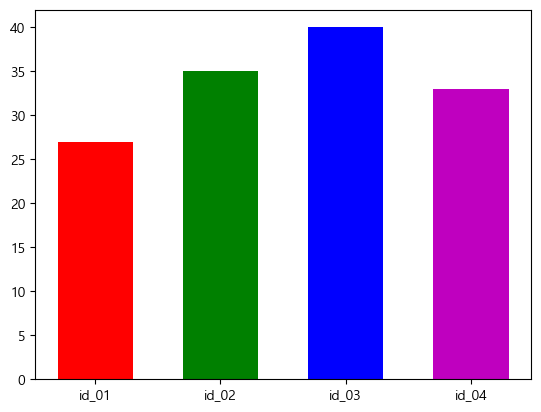

In [7]:
# 운동 시작 전 윗몸일으키기 그래프
# plt.bar(x축값, y축값)
colors = ['r', 'g', 'b', 'm'] # 차례대로 색깔명의 첫 글자를 리스트로
plt.bar(index, before_ex, color=colors, tick_label=member_ids, width=0.6) # width=1(default)
plt.show() # 그래프 보여줌 

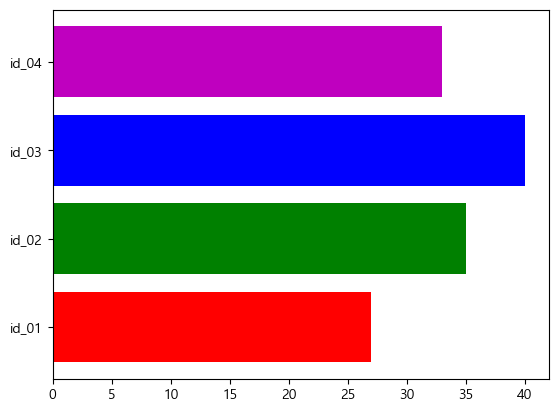

In [8]:
# 가로 막대 그래프 - barh()
# width 옵션 사용 X
plt.barh(index, before_ex, color=colors, tick_label=member_ids)
plt.show()

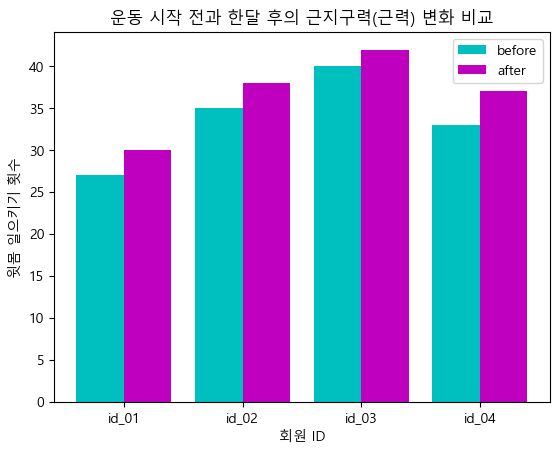

In [9]:
# 운동 시작 전과 한달 후 비교 막대 그래프
bar_width = 0.4 
# 시작 전 그래프
plt.bar(index, before_ex, color='c', align='edge', width=bar_width, label='before')
# 한달 후 그래프
# -> 그래프가 겹치지 않도록 x축 막대그래프 시작 위치를 너비(bar_width)만큼 오른쪽으로 증가
plt.bar(index+bar_width, after_ex, color='m', align='edge', width=bar_width, label='after')

plt.title('운동 시작 전과 한달 후의 근지구력(근력) 변화 비교') # 차트 제목
plt.xlabel('회원 ID') # x축 제목
plt.ylabel('윗몸 일으키기 횟수') # y축 제목
plt.xticks(index+bar_width, member_ids) # xticks(tick위치(x축에서), tick_label)
plt.legend() # 범례 설정(범례명은 label이 사용됨)
plt.show()

In [12]:
# 에어코리아 미세먼지 시각화
import pandas as pd

file_path = './input/fine_dust.xlsx' # 엑셀 파일 경로
# 상대 경로 복사(상대경로) : input\fine_dust.xlsx
# 경로 복사(절대경로) : C:\Users\Administrator\m02\input\fine_dust.xlsx

# 1. 파일 읽기(컬럼명이 없는 파일 -> 옵션 필요 : header=None)
df = pd.read_excel(file_path, header=None)

# 2. 인덱스 지정(지역명으로)
df = df.set_index(df.columns[0])

# 3. 컬럼명 지정(2001년 ~ 2023년)
columns = list(range(2001, 2024)) # [2001, 2002, ... 2023]
df.columns = columns # 컬럼명을 df에 적용

# 4. 인덱스에 이름 붙여주기
df.index.name = '지역'

df

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
지역,,,,,,,,,,,,,,,,,,,,,
서울,71(65),76(65),69(69),61(59),58(56),60(55),61(58),55(53),54(51),49(47),...,46(44),45(41),48(47),44(42),40(39),42(42),35(35),38(34),33(32),38(34)
부산,60(56),69(63),55(55),60(60),58(58),59(55),57(54),51(50),49(48),49(47),...,48(47),46(45),44(42),44(43),41(40),36(36),30(30),32(29),27(27),31(29)
대구,67(62),71(65),59(59),-,55(54),54(50),53(49),57(54),48(46),51(48),...,45(44),46(45),43(42),42(42),39(38),39(39),34(34),35(32),30(30),35(32)
인천,52(48),57(52),61(60),62(61),61(59),68(63),64(61),57(56),60(57),55(53),...,49(47),53(48),49(48),46(44),40(39),43(42),34(33),39(35),33(32),41(38)
광주,57(53),52(46),36(36),46(46),49(47),55(52),52(49),50(47),46(44),45(42),...,41(39),43(40),40(38),40(39),41(40),42(42),30(30),34(29),28(27),33(30)
대전,48(44),53(45),43(43),49(48),48(47),49(46),49(46),45(43),43(42),44(41),...,41(40),46(44),44(43),45(44),44(43),42(41),33(33),36(31),31(30),36(33)
울산,-,54(47),40(39),50(50),50(49),52(48),53(49),54(52),49(48),48(46),...,46(45),46(45),43(41),43(42),40(39),37(36),30(30),30(28),29(28),35(32)
세종,-,-,-,-,-,-,-,-,-,-,...,-,-,46(45),47(45),40(39),44(44),36(35),39(34),34(33),38(35)
경기,71(66),74(65),68(68),67(66),65(63),68(63),66(63),60(58),60(58),58(56),...,54(53),53(49),53(52),51(50),44(43),46(46),39(38),42(37),35(34),41(38)


In [13]:
# 데이터가 없는 세종시 데이터를 -> 0으로
# ()안의 데이터는 황사일자 제외 평균값 -> 없애기

df = df.replace('-', '0') # 데이터가 '-' -> '0'으로 채워줌

for year in range(2001, 2024):
    # ()안 데이터는 버리고 정수형으로 형변환
    df[year] = df[year].apply(lambda x: str(x)[:2]).astype(int)

df

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
지역,,,,,,,,,,,,,,,,,,,,,
서울,71,76,69,61,58,60,61,55,54,49,...,46,45,48,44,40,42,35,38,33,38
부산,60,69,55,60,58,59,57,51,49,49,...,48,46,44,44,41,36,30,32,27,31
대구,67,71,59,0,55,54,53,57,48,51,...,45,46,43,42,39,39,34,35,30,35
인천,52,57,61,62,61,68,64,57,60,55,...,49,53,49,46,40,43,34,39,33,41
광주,57,52,36,46,49,55,52,50,46,45,...,41,43,40,40,41,42,30,34,28,33
대전,48,53,43,49,48,49,49,45,43,44,...,41,46,44,45,44,42,33,36,31,36
울산,0,54,40,50,50,52,53,54,49,48,...,46,46,43,43,40,37,30,30,29,35
세종,0,0,0,0,0,0,0,0,0,0,...,0,0,46,47,40,44,36,39,34,38
경기,71,74,68,67,65,68,66,60,60,58,...,54,53,53,51,44,46,39,42,35,41


In [14]:
df.info() # Null 존재 확인, Dtype확인

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, 서울 to 제주
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   2001    17 non-null     int64
 1   2002    17 non-null     int64
 2   2003    17 non-null     int64
 3   2004    17 non-null     int64
 4   2005    17 non-null     int64
 5   2006    17 non-null     int64
 6   2007    17 non-null     int64
 7   2008    17 non-null     int64
 8   2009    17 non-null     int64
 9   2010    17 non-null     int64
 10  2011    17 non-null     int64
 11  2012    17 non-null     int64
 12  2013    17 non-null     int64
 13  2014    17 non-null     int64
 14  2015    17 non-null     int64
 15  2016    17 non-null     int64
 16  2017    17 non-null     int64
 17  2018    17 non-null     int64
 18  2019    17 non-null     int64
 19  2020    17 non-null     int64
 20  2021    17 non-null     int64
 21  2022    17 non-null     int64
 22  2023    17 non-null     int64
dtypes: int64(23)
memory u

지역
서울    48
부산    44
대구    43
인천    49
광주    40
Name: 2016, dtype: int64


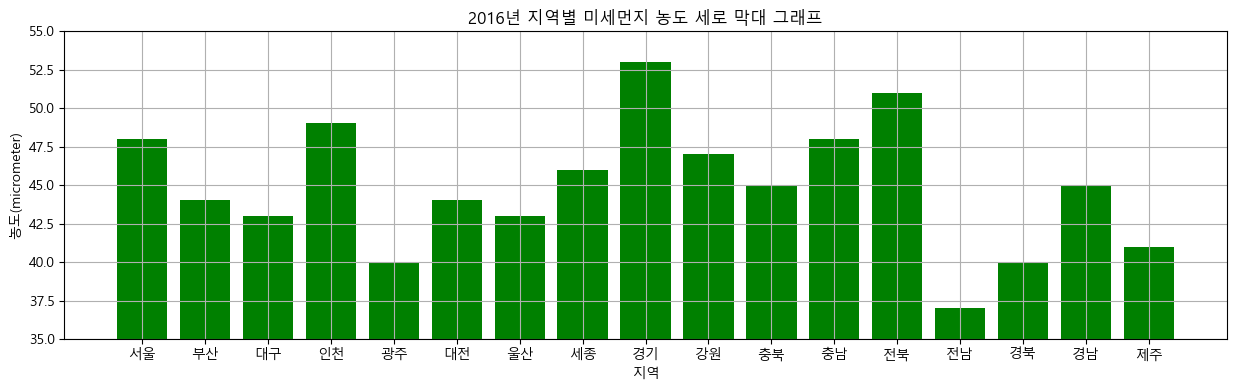

In [15]:
# 2016년 지역별 미세먼지 농도 세로 막대 그래프
data2016 = df[2016]
print(data2016.head()) # 확인 가능

plt.figure(figsize=(15, 4)) # 캔버스 크기 크게(가로 15인치 x 세로 4인치)
plt.bar(data2016.index, data2016, color='g')
plt.title('2016년 지역별 미세먼지 농도 세로 막대 그래프')
plt.xlabel('지역')
plt.ylabel('농도(micrometer)')
plt.ylim(35, 55) # y축 범위를 35 ~ 55로 조정
plt.grid() # 격자무늬보여줌
plt.show()

In [16]:
# 지역별(서울, 부산, 대구, 인천) 2019 ~ 2022년 그룹별 세로 막대그래프
index = np.arange(4) # 0 ~ 4
data = df.loc[:'인천', 2019 : 2022] # loc : 끝값 포함 (iloc : 끝값 포함 X)
# data # 잘 추출했는지 확인

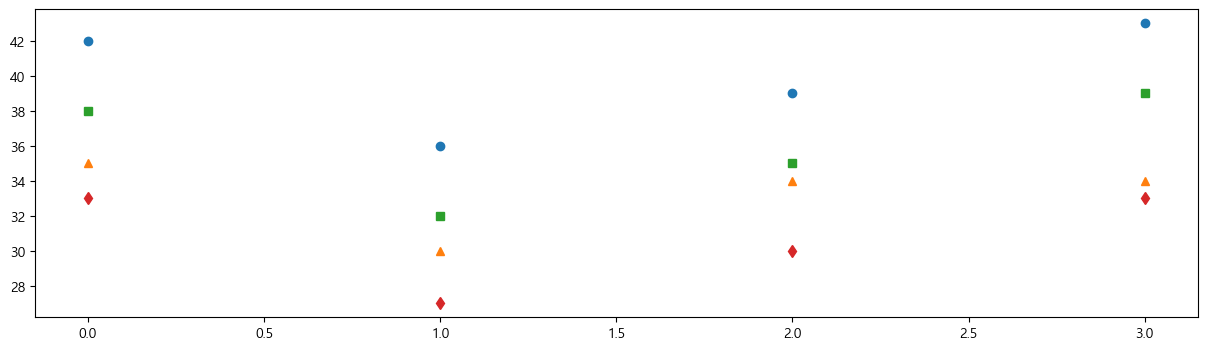

In [17]:
plt.figure(figsize=(15,4))
                        # 마커 모양
plt.plot(index, data[2019], 'o') # 동그라미
plt.plot(index, data[2020], '^') # 세모 ( 'v' -> 누운 세모)
plt.plot(index, data[2021], 's') # 네모
plt.plot(index, data[2022], 'd') # 마름모
plt.show()

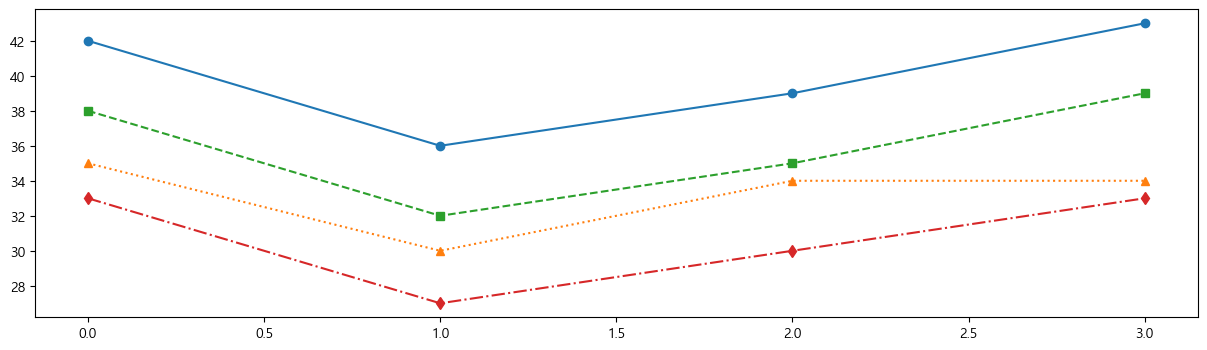

In [18]:
plt.figure(figsize=(15,4))

plt.plot(index, data[2019], 'o-') # - : 직선
plt.plot(index, data[2020], '^:') # : : 점선
plt.plot(index, data[2021], 's--') # -- : 파선
plt.plot(index, data[2022], 'd-.') # -. 
plt.show()

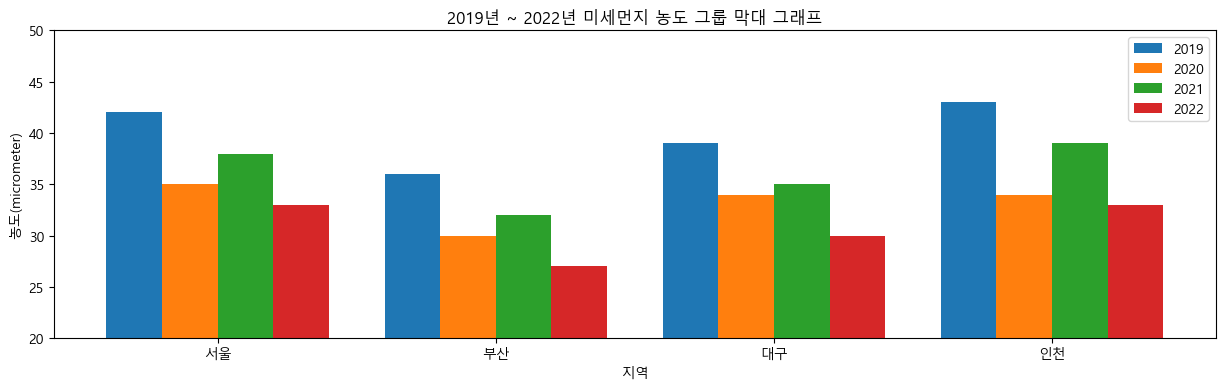

In [19]:
plt.figure(figsize=(15, 4))
for year in range(2019, 2023):
    chart_data = data[year] # 2019의 서울, 부산, 대구, 인천 데이터 읽고 2020, 2021, 2022의 데이터 읽기
    plt.bar(index, chart_data, width=0.2, label=str(year))
    index = index + 0.2  # 출력되는 위치를 0.2씩 이동(width = 0.2로 지정했기 때문)
    # index + 0.1로 실행시 데이터 부분 합쳐짐
    # index 실행X -> 누적으로 생김(index가 이동하질 않기 때문)

plt.title('2019년 ~ 2022년 미세먼지 농도 그룹 막대 그래프')
plt.xlabel('지역')
plt.ylabel('농도(micrometer)')
plt.ylim(20, 50)
plt.xticks(index-0.5, ['서울', '부산', '대구', '인천'])
plt.legend()
plt.show()

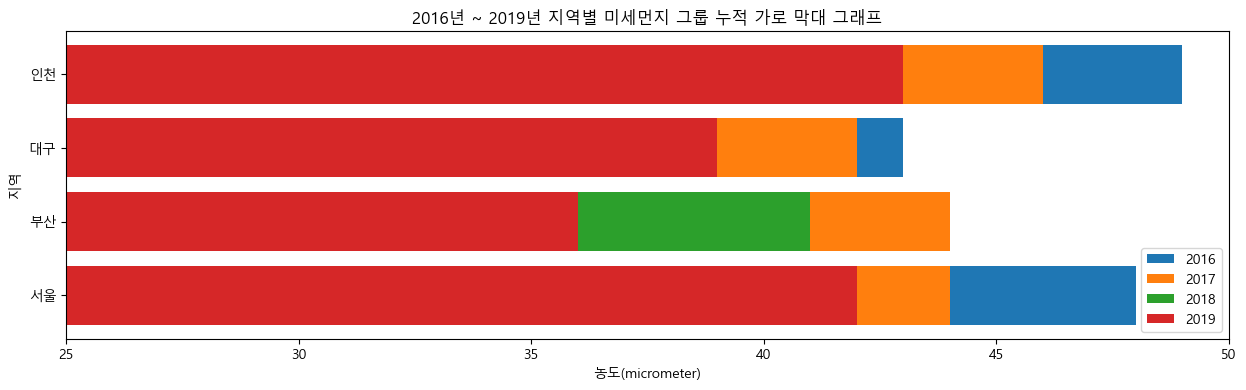

In [20]:
# 지역별 2016년 ~ 2019년 미세먼지 그룹 누적 가로 막대 그래프
plt.figure(figsize=(15,4))
data2 = df.loc['서울':'인천', 2016:2019]
for year in range(2016, 2020):
    chart_data2 = data2[year]
    plt.barh(index, chart_data2, label = str(year))
plt.title('2016년 ~ 2019년 지역별 미세먼지 그룹 누적 가로 막대 그래프')
plt.xlabel('농도(micrometer)')
plt.ylabel('지역')
plt.xlim(25, 50)
plt.yticks(index, ['서울', '부산', '대구', '인천'])
plt.legend()
plt.show()

In [21]:
# 산점도 실습 - 우리나라 주요 도시의 인구 밀도 시각화
city = ['서울', '인천', '대전', '대구', '울산', '부산', '광주']

# 위도(latitude)와 경도(longitude)
lat  = [37.56, 37.45, 36.35, 35.87, 35.53, 35.18, 35.16]
lon = [126.97, 126.70, 127.38, 128.60, 129.31, 129.07, 126.85]

# 인구 밀도(명/km^2): 2017년 통계청 자료
pop_den = [16154, 2751, 2839, 2790, 1099, 4454, 2995]

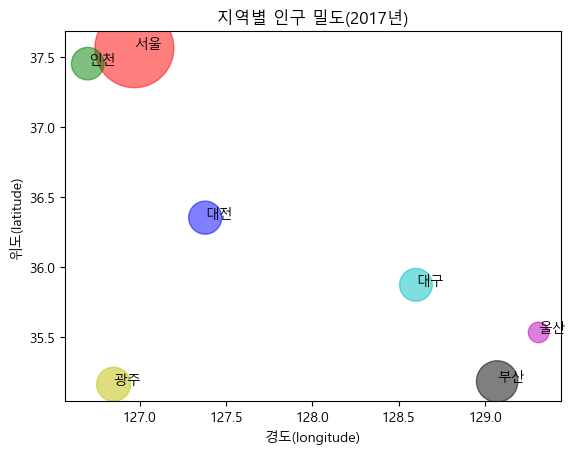

In [22]:
# 마커의 크기를 인구밀도와 비례하도록 설정
size = np.array(pop_den) * 0.2

# 도시별로 컬러를 다르게 지정
colors = ['r', 'g', 'b', 'c', 'm', 'k', 'y']

plt.scatter(lon, lat, s=size, c=colors, alpha=0.5) # x축 -> lon(경도), y축 -> lat(위도), alpha : 투명도(0 ~ 1(원상태, 가장 진함))
plt.xlabel('경도(longitude)')
plt.ylabel('위도(latitude)')
plt.title('지역별 인구 밀도(2017년)')

# 마커가 위치한 곳에 도시의 이름을 표시
for x, y, name in zip(lon, lat, city): # zip() : 튜플로 묶어줌(같은 인덱스번호끼리)
    plt.text(x, y, name) # 위도, 경도에 맞게 도시이름을 출력(x, y위치에 name)

plt.show()

In [26]:
# 산점도 실습 - 공공데이터포털 2023년 건강검진
data = pd.read_csv(r'input\국민건강보험공단_건강검진정보_2023.CSV.csv', encoding='cp949')
data.head()

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5cm단위),체중(5kg단위),허리둘레,시력(좌),시력(우),...,혈청지피티(ALT),감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,결손치 유무,치아마모증유무,제3대구치(사랑니) 이상,치석
0,2023,34735,46,2,9,155,70,92.0,1.2,1.2,...,24.0,50.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN
1,2023,4105118,11,1,17,160,55,86.0,0.9,9.9,...,11.0,31.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN
2,2023,362482,36,2,13,150,65,96.0,1.0,0.8,...,29.0,24.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN
3,2023,653166,11,1,13,160,70,85.0,1.0,1.2,...,21.0,27.0,3.0,1.0,1,0.0,NaN,NaN,NaN,0.0
4,2023,4152237,41,1,12,165,65,84.5,1.0,1.2,...,33.0,49.0,3.0,1.0,0,NaN,NaN,NaN,NaN,NaN


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 33 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   기준년도           1000000 non-null  int64  
 1   가입자일련번호        1000000 non-null  int64  
 2   시도코드           1000000 non-null  int64  
 3   성별코드           1000000 non-null  int64  
 4   연령대코드(5세단위)    1000000 non-null  int64  
 5   신장(5cm단위)      1000000 non-null  int64  
 6   체중(5kg단위)      1000000 non-null  int64  
 7   허리둘레           999589 non-null   float64
 8   시력(좌)          999816 non-null   float64
 9   시력(우)          999823 non-null   float64
 10  청력(좌)          999863 non-null   float64
 11  청력(우)          999862 non-null   float64
 12  수축기혈압          994253 non-null   float64
 13  이완기혈압          994253 non-null   float64
 14  식전혈당(공복혈당)     994186 non-null   float64
 15  총콜레스테롤         338606 non-null   float64
 16  트리글리세라이드       338606 non-null   float64
 17  HDL콜레스테롤 

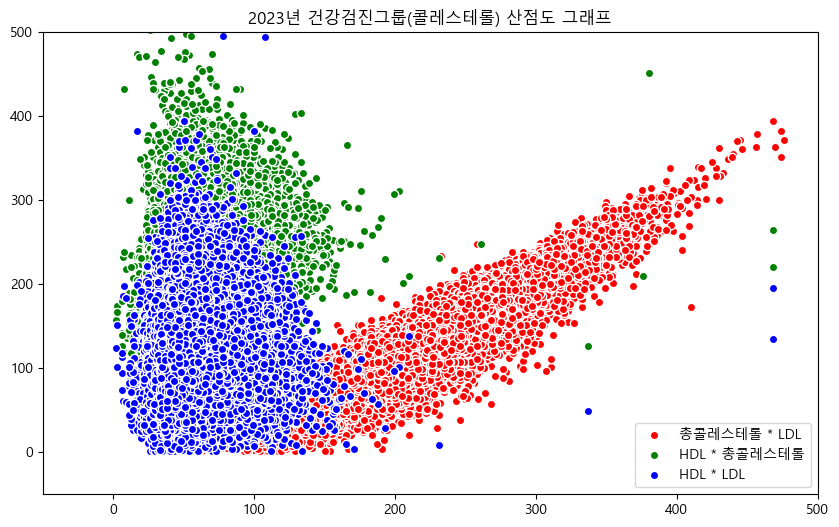

In [28]:
HDL_data = data['HDL콜레스테롤'] # 좋은 콜레스테롤(60이상) 수치가 높을수록 좋음
LDL_data = data['LDL콜레스테롤'] # 나쁜 콜레스테롤(130미만) 수치가 낮을수록 좋음
total_chol = data['총콜레스테롤'] # (200미만)-정상수치

plt.figure(figsize=(10,6))
plt.scatter(total_chol, LDL_data, color='r', edgecolors='w', label='총콜레스테롤 * LDL') # edgecolor : 마커테두리 색깔 지정
plt.scatter(HDL_data, total_chol, color='g', edgecolors='w', label='HDL * 총콜레스테롤')
plt.scatter(HDL_data, LDL_data, color='b', edgecolors='w', label='HDL * LDL')
plt.title('2023년 건강검진그룹(콜레스테롤) 산점도 그래프')
plt.xlim(-50, 500)
plt.ylim(-50, 500)
plt.legend(loc='lower right') # 오른쪽 아래 범례 위치 설정
plt.show()